In [ ]:
import pandas as pd
train=pd.read_csv('/content/drive/MyDrive/train (1).csv')

In [ ]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
print(train.shape)

(891, 12)


In [ ]:
NAs=pd.concat([train.isnull().sum()],axis=1,keys=["Train"])
NAs[NAs.sum(axis=1)>0]

,Train
Age,177
Cabin,687
Embarked,2


In [ ]:
train.pop("Cabin")
train.pop("Name")
train.pop("Ticket")

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

In [ ]:
train["Age"]=train["Age"].fillna(train["Age"].mean())

In [ ]:
train["Embarked"]=train["Embarked"].fillna(train["Embarked"].mode()[0])

In [ ]:
train["Pclass"]=train["Pclass"].apply(str)

In [ ]:
for col in train.dtypes[train.dtypes=="object"].index:
  for_dummy = train.pop(col)
  train = pd.concat([train,pd.get_dummies(for_dummy,prefix=col)],axis=1)
train.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,2,1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,3,1,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,4,1,35.0,1,0,53.1000,1,0,0,1,0,0,0,1
4,5,0,35.0,0,0,8.0500,0,0,1,0,1,0,0,1


In [ ]:
labels=train.pop("Survived")


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(train,labels,test_size=0.25)
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred=rf.predict(x_test)

In [ ]:
from sklearn.metrics import roc_curve,auc
false_positive_rate,true_positive_rate,thresholds = roc_curve(y_test,y_pred)
roc_auc=auc(false_positive_rate,true_positive_rate)
roc_auc

0.8175950486295315

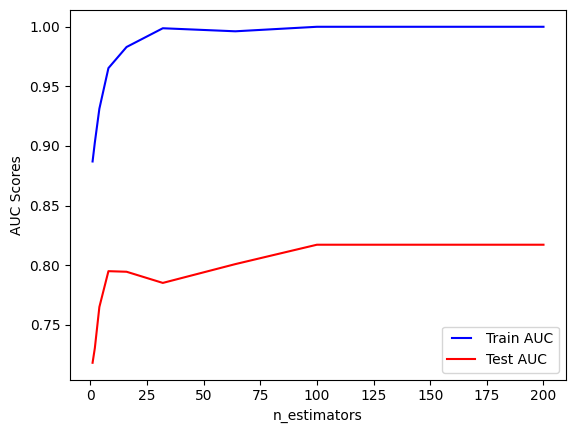

In [ ]:
n_estimators=[1,2,4,8,16,32,64,100,200]
train_results=[]
test_results=[]
for estimator in n_estimators:
  rf=RandomForestClassifier(n_estimators=estimator,n_jobs=-1)
  rf.fit(x_train,y_train)
  train_pred=rf.predict(x_train)
  false_positive_rate,true_positive_rate,thresholds=roc_curve(y_train,train_pred)
  roc_auc=auc(false_positive_rate,true_positive_rate)
  train_results.append(roc_auc)
  y_pred=rf.predict(x_test)
  false_positive_rate,true_positive_rate,thesholds=roc_curve(y_test,y_pred)
  roc_auc=auc(false_positive_rate,true_positive_rate)
  test_results.append(roc_auc)

from matplotlib.legend_handler import HandlerLine2D
line1, =plt.plot(n_estimators,train_results,"b",label="Train AUC")
line2, =plt.plot(n_estimators,test_results,"r",label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC Scores")
plt.xlabel("n_estimators")
plt.show()